## initial condition u(x,0)=cos(2πx)+1, boundaries u(0,t)=u(1,t)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

N = 30
hx = 1.0/(N+1)
ht = 0.5*hx

tf = 0.25
nt=int(tf/ht)

Un = np.zeros(N+2)
Unp1 = np.zeros(N+2)
x = np.linspace(0,1,N+2)

finite difference


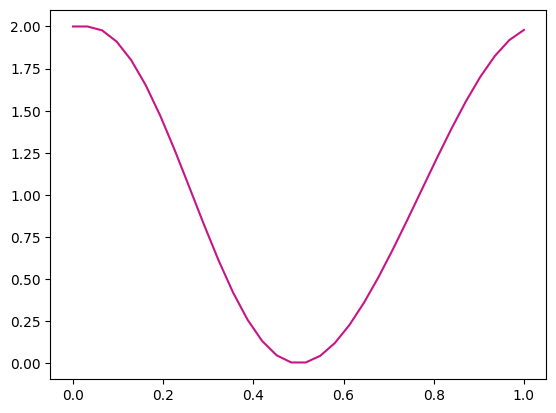

In [ ]:
#initial condition (positive)
for i in range(N+2):
  Un[i] = 1.0+np.cos(2.0*np.pi*x[i])
for n in range(nt):
  for i in range(N+2):
    if i>0:
     Unp1[i]=Un[i]-ht/hx*Un[i]*(Un[i]-Un[i-1])
    else:
     Unp1[i]=Un[i]-ht/hx*Un[i]*(Un[i]-Un[-1])
Un = Unp1.copy()
plt.plot(x,Un, color='mediumvioletred')

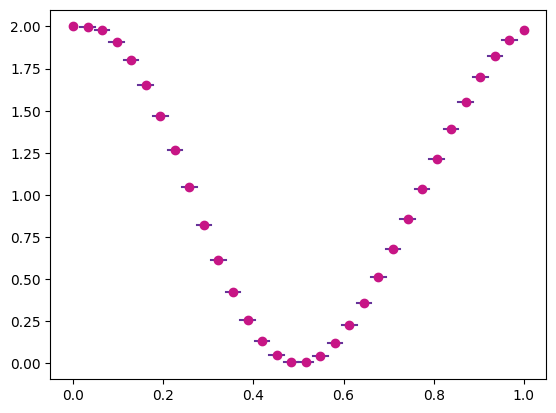

In [ ]:
for i in range(1,N+1):
  xm = (x[i] + x[i-1])/2
  xp = (x[i] + x[i+1])/2
  xx = np.linspace(xm,xp,5)
  yy = Un[i]*np.ones(5)
  plt.plot(xx,yy,'-', color='rebeccapurple')
plt.plot(x,Un,'o', color='mediumvioletred')

## finite volume


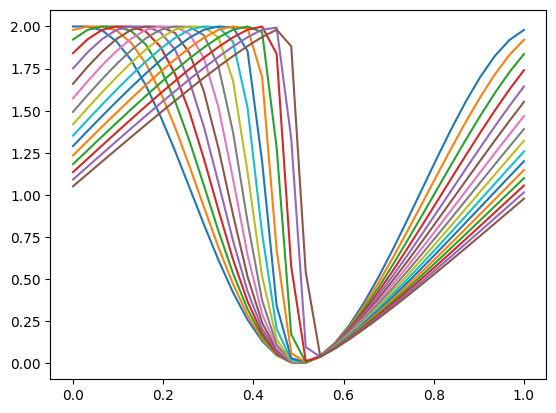

In [ ]:
def flux(u):
  return 0.5*u*u

plt.plot(x,Un)
for n in range(nt):
  for i in range(N+2):
    if i>0:
      Unp1[i]=Un[i]+ht/hx*(flux(Un[i-1])-flux(Un[i]))
    else:
      Unp1[i]=Un[i]+ht/hx*(flux(Un[-1])-flux(Un[i]))
  Un = Unp1.copy()
  plt.plot(x,Un)

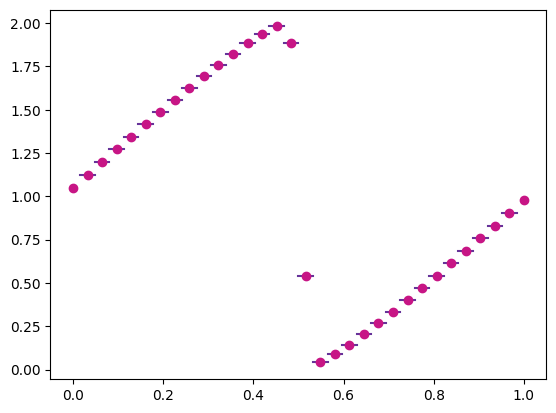

In [ ]:
for i in range(1,N+1):
  xm = (x[i] + x[i-1])/2
  xp = (x[i] + x[i+1])/2
  xx = np.linspace(xm,xp,5)
  yy = Un[i]*np.ones(5)
  plt.plot(xx,yy,'-', color='rebeccapurple')
plt.plot(x,Un,'o', color='mediumvioletred')

## initial condition u(x,0) = {2, x<0.5} or {1, x≥0.5}
## boundaries u(0,t) = 2, u(1,t) = 1
## hx = 0.025, ht = 0.0125, tf = 0.2

In [ ]:
hx = 0.025
ht = 0.0125
tf = 0.2

N = int(1.0 / hx) - 1
nt = int(tf / ht)

Un = np.zeros(N + 2)
Unp1 = np.zeros(N + 2)
x = np.linspace(0, 1, N + 2)

finite difference

In [ ]:
#initial condition
for i in range(N + 2):
    if x[i] < 0.5:
        Un[i] = 2.0
    else:
        Un[i] = 1.0

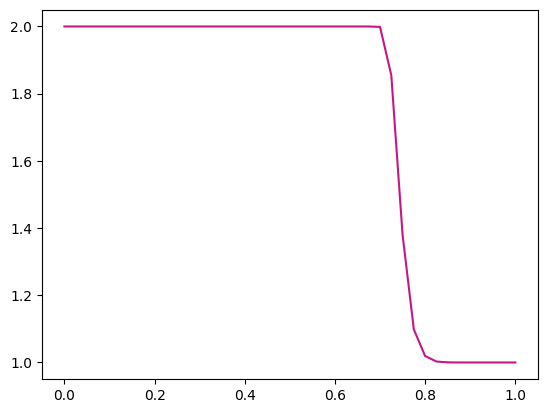

In [ ]:
for n in range(nt):
    for i in range(1, N + 1):
        Unp1[i] = Un[i] - ht / hx * Un[i] * (Un[i] - Un[i - 1])

    Unp1[0] = 2.0
    Unp1[-1] = 1.0
    Un = Unp1.copy()

plt.plot(x, Un, color='mediumvioletred')

finite volume



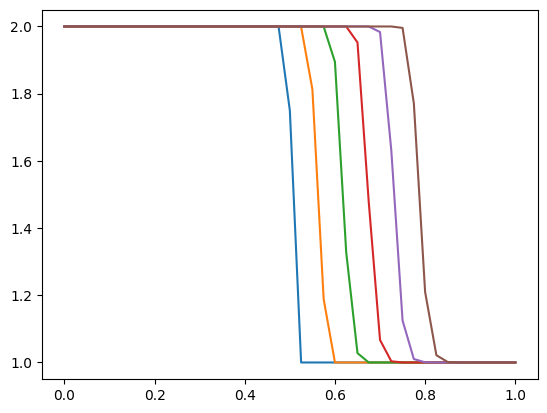

In [ ]:
#initial condition:
for i in range(N + 2):
    if x[i] < 0.5:
        Un[i] = 2.0
    else:
        Un[i] = 1.0

for n in range(nt):
    for i in range(1, N + 1):
        Unp1[i] = Un[i] - ht / hx * (flux(Un[i]) - flux(Un[i - 1]))

    Unp1[0] = 2.0
    Unp1[-1] = 1.0
    Un = Unp1.copy()

    if n % (nt // 5) == 0:
        plt.plot(x, Un, label=f"t = {ht * n:.2f}")

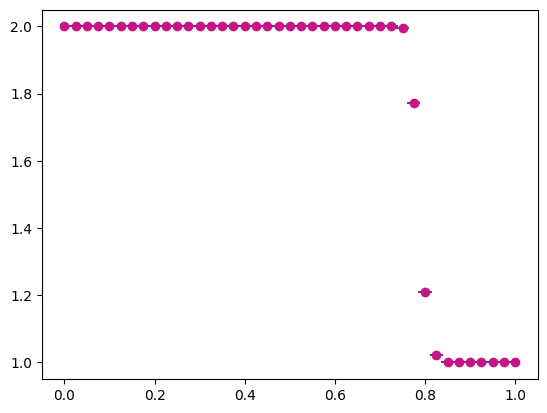

In [ ]:
for i in range(1, N + 1):
    xm = (x[i] + x[i - 1]) / 2
    xp = (x[i] + x[i + 1]) / 2
    xx = np.linspace(xm, xp, 5)
    yy = Un[i] * np.ones(5)
    plt.plot(xx, yy, '-', color='rebeccapurple')

plt.plot(x, Un, 'o', color='mediumvioletred')